In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nsepy import get_history
from datetime import date

In [2]:
# symbol = ["NIFTY 50","NIFTY NEXT 50","NIFTY MIDCAP SELECT","NIFTY BANK","NIFTY FINANCIAL SERVICES"]

symbol = ["NIFTY 50"]

df = []
df = pd.DataFrame(df)

for x in symbol:
    data = get_history(symbol=x, start=date(2012,3,1), end=date(2022,3,1), index = True)
    data = pd.DataFrame(data)
    data['Index_Name'] = x
    df = pd.concat([df,data])
    print(x)

NIFTY 50


In [3]:
df.head()

,Open,High,Low,Close,Volume,Turnover,Index_Name
Date,,,,,,,
2012-03-01,5366.00,5372.45,5297.50,5339.75,196867905,6.847630e+10,NIFTY 50
2012-03-02,5369.45,5392.55,5315.05,5359.35,185021526,6.768520e+10,NIFTY 50
2012-03-03,5360.05,5369.60,5353.40,5359.40,16770991,4.293500e+09,NIFTY 50
2012-03-05,5342.55,5344.50,5265.70,5280.35,196421155,6.036630e+10,NIFTY 50
2012-03-06,5266.00,5382.05,5206.40,5222.40,290396014,9.319010e+10,NIFTY 50


In [4]:
df.shape

(2477, 7)

In [5]:
df.to_csv("NSE_Extracted_data.csv", index=True)

In [7]:
df = df.reset_index()["Close"]
df

0        5339.75
1        5359.35
2        5359.40
3        5280.35
4        5222.40
          ...   
2472    17092.20
2473    17063.25
2474    16247.95
2475    16658.40
2476    16793.90
Name: Close, Length: 2477, dtype: float64

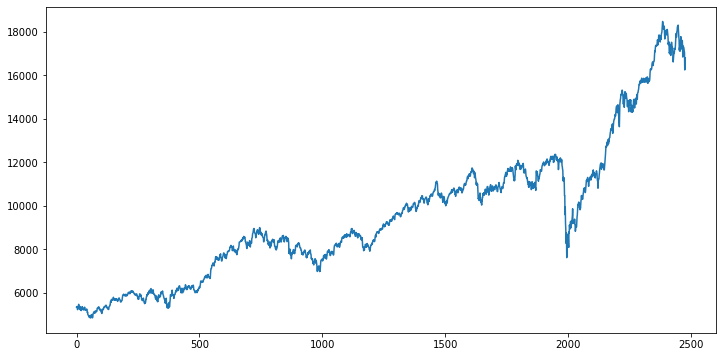

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1)) 

In [11]:
print(df)

[[0.03695369]
 [0.03839049]
 [0.03839415]
 ...
 [0.83659302]
 [0.86668157]
 [0.87661457]]


In [12]:
training_size = int(len(df)*0.70)
test_size = len(df) - training_size
train_data, test_data = df[0:training_size,:], df[training_size:len(df),:]

In [13]:
training_size,test_size

(1733, 744)

In [14]:
print(train_data)

[[0.03695369]
 [0.03839049]
 [0.03839415]
 ...
 [0.43661208]
 [0.44309602]
 [0.4398119 ]]


In [15]:
print(test_data)

[[0.43771167]
 [0.43667439]
 [0.44187913]
 [0.45096544]
 [0.45577067]
 [0.45615186]
 [0.45448048]
 [0.46420455]
 [0.47396528]
 [0.47693419]
 [0.47704781]
 [0.48317621]
 [0.48576759]
 [0.49091369]
 [0.49008166]
 [0.48537907]
 [0.47785418]
 [0.48731069]
 [0.48451039]
 [0.49367   ]
 [0.49762121]
 [0.50093832]
 [0.50416746]
 [0.499091  ]
 [0.49572258]
 [0.50070374]
 [0.49619907]
 [0.50114358]
 [0.49471828]
 [0.49562728]
 [0.49905435]
 [0.50249241]
 [0.50958846]
 [0.50707039]
 [0.49546234]
 [0.49410618]
 [0.50511678]
 [0.49893339]
 [0.50720601]
 [0.50672951]
 [0.50501415]
 [0.50409782]
 [0.49574091]
 [0.48838462]
 [0.47823537]
 [0.47400927]
 [0.47233055]
 [0.46274942]
 [0.46816309]
 [0.46339452]
 [0.47073248]
 [0.48173208]
 [0.51260135]
 [0.50386691]
 [0.50597813]
 [0.50005131]
 [0.51376325]
 [0.5196754 ]
 [0.51996862]
 [0.51500946]
 [0.52122583]
 [0.51953245]
 [0.53168297]
 [0.52677878]
 [0.51373759]
 [0.51570953]
 [0.51952512]
 [0.52266996]
 [0.51831557]
 [0.51889102]
 [0.51223848]
 [0.50

In [16]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(1632, 100)
(1632,)


(None, None)

In [19]:
print(X_test.shape), print(y_test.shape)

(643, 100)
(643,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
print(X_train.shape), print(X_test.shape)

(1632, 100, 1)
(643, 100, 1)


(None, None)

In [22]:
### Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 18s 316ms/step - loss: 0.0069 - val_loss: 0.0223
Epoch 2/100
26/26 [==============================] - 8s 326ms/step - loss: 5.6192e-04 - val_loss: 0.0034
Epoch 3/100
26/26 [==============================] - 8s 310ms/step - loss: 2.7720e-04 - val_loss: 0.0049
Epoch 4/100
26/26 [==============================] - 7s 286ms/step - loss: 2.5666e-04 - val_loss: 0.0043
Epoch 5/100
26/26 [==============================] - 7s 287ms/step - loss: 2.5587e-04 - val_loss: 0.0037
Epoch 6/100
26/26 [==============================] - 7s 285ms/step - loss: 2.5478e-04 - val_loss: 0.0034
Epoch 7/100
26/26 [==============================] - 7s 285ms/step - loss: 2.4476e-04 - val_loss: 0.0029
Epoch 8/100
26/26 [==============================] - 7s 284ms/step - loss: 2.5090e-04 - val_loss: 0.0030
Epoch 9/100
26/26 [==============================] - 7s 277ms/step - loss: 2.3529e-04 - val_loss: 0.0032
Epoch 10/100
26/26 [==============================] - 7s 2

In [26]:
import tensorflow as tf

In [27]:
### Lets Do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
##Transformback to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8330.593486938737

In [31]:
### Test Data RMSE

math.sqrt(mean_squared_error(y_test,test_predict))

13406.32943343108

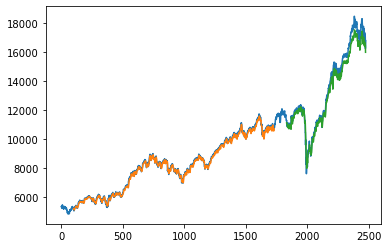

In [34]:
### Plotting 

# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

744

In [36]:
x_input=test_data[644:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.9390788335508086,
 0.9496605920213467,
 0.9573467532657939,
 0.9610670459043794,
 0.9644391338132451,
 0.9768865365724927,
 0.9898470831439589,
 1.0,
 0.9957262451068073,
 0.9845726978169397,
 0.9780850939053175,
 0.973452138343572,
 0.9742218540619,
 0.9847046490829389,
 0.9804932045098013,
 0.9545647807409797,
 0.9409591390912958,
 0.9598721538844989,
 0.9568885891477416,
 0.9525085401791605,
 0.958930168457783,
 0.9700543932440951,
 0.9682730511531076,
 0.9662901168501769,
 0.9557633380738048,
 0.9725614672980779,
 0.9730526192326302,
 0.9649706041901859,
 0.957599659858959,
 0.9477876171067486,
 0.9222587124488689,
 0.9286216957203807,
 0.9221487530605362,
 0.9310334716378085,
 0.8936619408565104,
 0.8956778629759411,
 0.8904914451595879,
 0.9039578049173841,
 0.9211664491914321,
 0.9061423314322578,
 0.885290366091457,
 0.9046762062544901,
 0.9261586054217309,
 0.9296113302153738,
 0.9292044804785432,
 0.91871802014456,
 0.9155401938217488,
 0.907952996026801,
 0.90993226501678

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8271271]
101
1 day input [0.94966059 0.95734675 0.96106705 0.96443913 0.97688654 0.98984708
 1.         0.99572625 0.9845727  0.97808509 0.97345214 0.97422185
 0.98470465 0.9804932  0.95456478 0.94095914 0.95987215 0.95688859
 0.95250854 0.95893017 0.97005439 0.96827305 0.96629012 0.95576334
 0.97256147 0.97305262 0.9649706  0.95759966 0.94778762 0.92225871
 0.9286217  0.92214875 0.93103347 0.89366194 0.89567786 0.89049145
 0.9039578  0.92116645 0.90614233 0.88529037 0.90467621 0.92615861
 0.92961133 0.92920448 0.91871802 0.91554019 0.907953   0.90993227
 0.89063806 0.86344144 0.87492486 0.8884572  0.89704502 0.89199789
 0.89804566 0.90882168 0.90738121 0.9066738  0.91767707 0.93759072
 0.95075286 0.95954961 0.94640213 0.95129899 0.96527116 0.96911607
 0.98059583 0.9839276  0.98377732 0.98761491 0.97331652 0.96051358
 0.94721583 0.93696395 0.90265295 0.91209846 0.89979767 0.89919656
 0.91663612 0.93400971 0.94890187 0.93278916 0.92957101 0.90738121
 0.91127743 0.92572243 0.93613559 

9 day output [[0.6699565]]
10 day input [0.97808509 0.97345214 0.97422185 0.98470465 0.9804932  0.95456478
 0.94095914 0.95987215 0.95688859 0.95250854 0.95893017 0.97005439
 0.96827305 0.96629012 0.95576334 0.97256147 0.97305262 0.9649706
 0.95759966 0.94778762 0.92225871 0.9286217  0.92214875 0.93103347
 0.89366194 0.89567786 0.89049145 0.9039578  0.92116645 0.90614233
 0.88529037 0.90467621 0.92615861 0.92961133 0.92920448 0.91871802
 0.91554019 0.907953   0.90993227 0.89063806 0.86344144 0.87492486
 0.8884572  0.89704502 0.89199789 0.89804566 0.90882168 0.90738121
 0.9066738  0.91767707 0.93759072 0.95075286 0.95954961 0.94640213
 0.95129899 0.96527116 0.96911607 0.98059583 0.9839276  0.98377732
 0.98761491 0.97331652 0.96051358 0.94721583 0.93696395 0.90265295
 0.91209846 0.89979767 0.89919656 0.91663612 0.93400971 0.94890187
 0.93278916 0.92957101 0.90738121 0.91127743 0.92572243 0.93613559
 0.91919451 0.88019925 0.91755978 0.91534227 0.91405208 0.91197751
 0.90687173 0.89848183 

19 day output [[0.5351442]]
20 day input [0.95893017 0.97005439 0.96827305 0.96629012 0.95576334 0.97256147
 0.97305262 0.9649706  0.95759966 0.94778762 0.92225871 0.9286217
 0.92214875 0.93103347 0.89366194 0.89567786 0.89049145 0.9039578
 0.92116645 0.90614233 0.88529037 0.90467621 0.92615861 0.92961133
 0.92920448 0.91871802 0.91554019 0.907953   0.90993227 0.89063806
 0.86344144 0.87492486 0.8884572  0.89704502 0.89199789 0.89804566
 0.90882168 0.90738121 0.9066738  0.91767707 0.93759072 0.95075286
 0.95954961 0.94640213 0.95129899 0.96527116 0.96911607 0.98059583
 0.9839276  0.98377732 0.98761491 0.97331652 0.96051358 0.94721583
 0.93696395 0.90265295 0.91209846 0.89979767 0.89919656 0.91663612
 0.93400971 0.94890187 0.93278916 0.92957101 0.90738121 0.91127743
 0.92572243 0.93613559 0.91919451 0.88019925 0.91755978 0.91534227
 0.91405208 0.91197751 0.90687173 0.89848183 0.89635961 0.83659302
 0.86668157 0.87661457 0.8271271  0.81016463 0.78723389 0.76518011
 0.74513084 0.72722393 

29 day output [[0.454632]]
[[0.8271270990371704], [0.8101646304130554], [0.7872338891029358], [0.7651801109313965], [0.7451308369636536], [0.7272239327430725], [0.711235523223877], [0.6967150568962097], [0.6831251382827759], [0.6699565052986145], [0.6568068861961365], [0.6434230208396912], [0.6297054886817932], [0.6156915426254272], [0.6015186309814453], [0.5873826742172241], [0.5734974145889282], [0.5600624084472656], [0.5472398996353149], [0.5351442098617554], [0.5238405466079712], [0.5133506655693054], [0.5036619305610657], [0.4947388768196106], [0.48653385043144226], [0.47899529337882996], [0.4720744490623474], [0.4657288193702698], [0.4599238336086273], [0.4546320140361786]]


In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
len(df)

2477

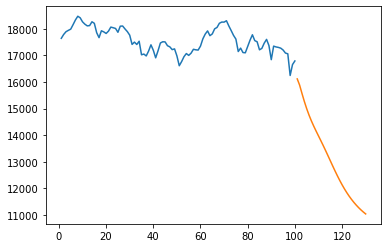

In [42]:
plt.plot(day_new,scaler.inverse_transform(df[2377:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

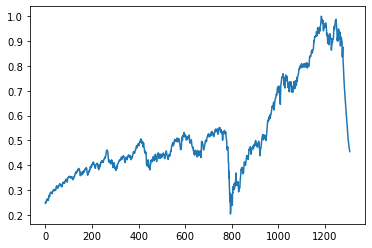

In [43]:
df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

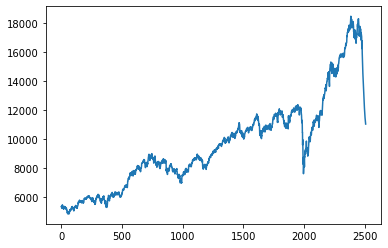

In [44]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)